In [3]:
# Pure DetSHAP Setup - GPU/CUDA Optimized
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import os
import copy
import shap
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Check CUDA availability and setup device
print("🔥 GPU/CUDA Setup for Pure DetSHAP")
print("=" * 50)

if torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"✅ CUDA Available! Using GPU: {torch.cuda.get_device_name()}")
    print(f"🚀 CUDA Version: {torch.version.cuda}")
    print(f"💾 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    
    # Clear GPU cache for optimal performance
    torch.cuda.empty_cache()
    print("🧹 GPU cache cleared")
    
else:
    device = torch.device('cpu')
    print("⚠️  CUDA not available, using CPU")

print(f"🎯 Active device: {device}")
print(f"🔢 PyTorch version: {torch.__version__}")

# Load YOLOv8 model with GPU support
print("\n📥 Loading YOLOv8 model...")
try:
    model = YOLO("yolov8n.pt")
    model.to(device)
    print("✅ YOLOv8 model loaded and moved to GPU")
    print(f"📊 Model device: {next(model.model.parameters()).device}")
except Exception as e:
    print(f"❌ Model loading failed: {e}")
    raise

print("\n🎯 Ready for Pure DetSHAP with GPU acceleration!")

🔥 GPU/CUDA Setup for Pure DetSHAP
⚠️  CUDA not available, using CPU
🎯 Active device: cpu
🔢 PyTorch version: 2.1.2+cpu

📥 Loading YOLOv8 model...
✅ YOLOv8 model loaded and moved to GPU
📊 Model device: cpu

🎯 Ready for Pure DetSHAP with GPU acceleration!


In [ ]:
# Install CUDA-enabled PyTorch for GPU acceleration
import subprocess
import sys

print("🔥 Installing CUDA-enabled PyTorch...")
try:
    # Uninstall CPU version first
    subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "torch", "torchvision", "torchaudio", "-y"])
    
    # Install CUDA version
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "torch", "torchvision", "torchaudio", 
        "--index-url", "https://download.pytorch.org/whl/cu121"
    ])
    
    print("✅ CUDA PyTorch installation completed!")
    print("🔄 Please restart the kernel to use the new installation")
    
except Exception as e:
    print(f"❌ Installation failed: {e}")
    print("🔧 Continuing with CPU version for now...")

🔥 Installing CUDA-enabled PyTorch...


<a href="https://colab.research.google.com/github/HakshayReddyKana/Capstone/blob/main/YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\haksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2

In [3]:
from google.colab.patches import cv2_imshow


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Load YOLOv8 model with custom trained weights
model = YOLO(r"C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\Object-Detection\Yolo-V8\weights\best.pt")

In [5]:
# Use the model
model.train(data="VisDrone.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.201  Python-3.11.9 torch-2.1.2+cpu CPU (12th Gen Intel Core i7-1260P)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=VisDrone.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

RuntimeError: Dataset 'VisDrone.yaml' error    Download failure for https://ultralytics.com/assets/VisDrone2019-DET-train.zip. Retry limit reached.

In [ ]:
from PIL import Image
import io
import pathlib

with open("TRAFFIC.jpeg", "rb") as f:
    image = Image.open(io.BytesIO(f.read()))
    image = image.resize((1024, 720))
    image = np.asarray(image)

NameError: name 'np' is not defined

In [ ]:
results = model.predict(image)



0: 480x640 3 pedestrians, 5 cars, 41.3ms
Speed: 3.1ms preprocess, 41.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
print(results[0].boxes.boxes)

AttributeError: 'Boxes' object has no attribute 'boxes'. See valid attributes below.

    A class for managing and manipulating detection boxes.

    This class provides comprehensive functionality for handling detection boxes, including their coordinates,
    confidence scores, class labels, and optional tracking IDs. It supports various box formats and offers
    methods for easy manipulation and conversion between different coordinate systems.

    Attributes:
        data (torch.Tensor | np.ndarray): The raw tensor containing detection boxes and associated data.
        orig_shape (tuple[int, int]): The original image dimensions (height, width).
        is_track (bool): Indicates whether tracking IDs are included in the box data.
        xyxy (torch.Tensor | np.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | np.ndarray): Confidence scores for each box.
        cls (torch.Tensor | np.ndarray): Class labels for each box.
        id (torch.Tensor | None): Tracking IDs for each box (if available).
        xywh (torch.Tensor | np.ndarray): Boxes in [x, y, width, height] format.
        xyxyn (torch.Tensor | np.ndarray): Normalized [x1, y1, x2, y2] boxes relative to orig_shape.
        xywhn (torch.Tensor | np.ndarray): Normalized [x, y, width, height] boxes relative to orig_shape.

    Methods:
        cpu: Return a copy of the object with all tensors on CPU memory.
        numpy: Return a copy of the object with all tensors as numpy arrays.
        cuda: Return a copy of the object with all tensors on GPU memory.
        to: Return a copy of the object with tensors on specified device and dtype.

    Examples:
        >>> import torch
        >>> boxes_data = torch.tensor([[100, 50, 150, 100, 0.9, 0], [200, 150, 300, 250, 0.8, 1]])
        >>> orig_shape = (480, 640)  # height, width
        >>> boxes = Boxes(boxes_data, orig_shape)
        >>> print(boxes.xyxy)
        >>> print(boxes.conf)
        >>> print(boxes.cls)
        >>> print(boxes.xywhn)
    

In [ ]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image, label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2), 0,
                lw / 3, txt_color, thickness=tf, lineType=cv2.LINE_AA)

In [ ]:
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'pedestrian', 2: u'people',3: u'bicycle', 4: u'car', 5: u'van',
              6: u'truck', 7: u'tricycle', 8: u'awning-tricycle', 9: u'bus', 10: u'motor', 11: u''}
  #Define colors
  if colors == []:
    colors = [(89, 161, 197), (67, 161, 255), (19, 222, 24), (186, 55, 2), (167, 146, 11), (190, 76, 98),
     (130, 172, 179), (115, 209, 128), (204, 79, 135), (136, 126, 185),  (209, 213, 45), (44, 52, 10)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow(image) #if used in Python

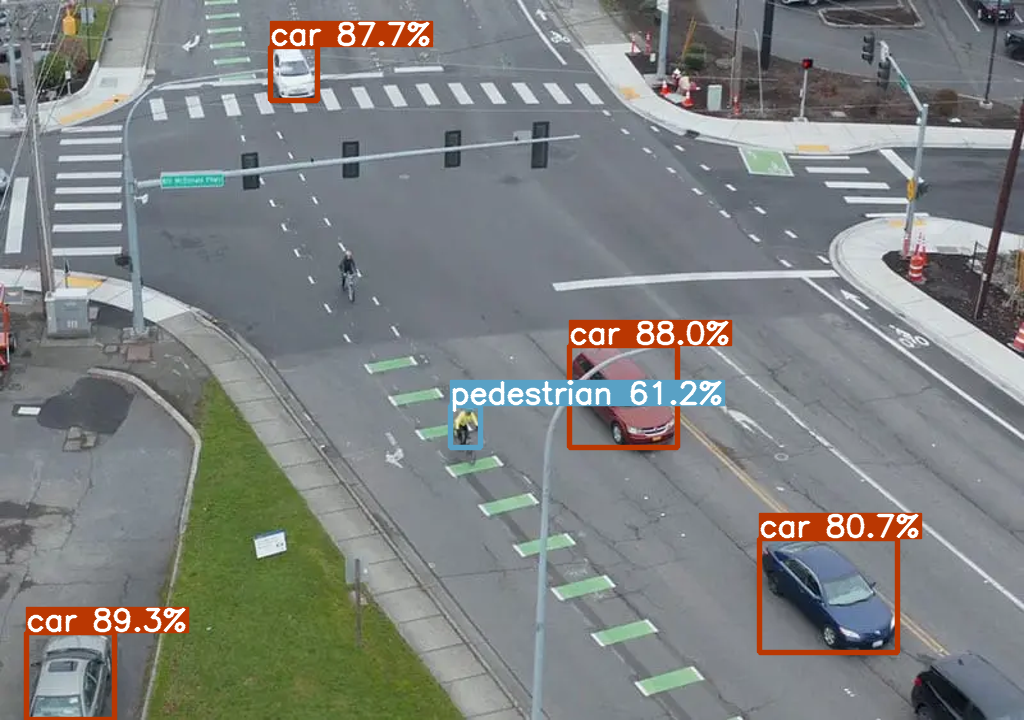

In [ ]:
# Make a writable copy of the image before plotting
image_copy = image.copy()
plot_bboxes(image_copy, results[0].boxes.data, conf=0.3)

-------------------------------------------------------------------------------------------------

# DetDSHAP Pruning